<a href="https://colab.research.google.com/github/mohanbaskaran7373-jpg/prediction-of-loan-/blob/main/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Silhouette Scores (K = 2 to 7):
K = 2 → Silhouette Score = 0.5772
K = 3 → Silhouette Score = 0.7352
K = 4 → Silhouette Score = 0.7518
K = 5 → Silhouette Score = 0.5986
K = 6 → Silhouette Score = 0.6169
K = 7 → Silhouette Score = 0.5827


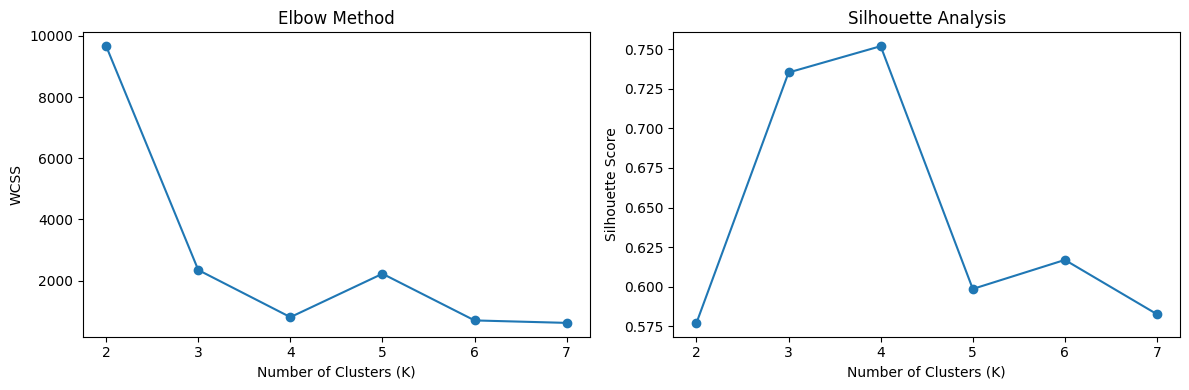


Best K selected using Silhouette Score: K = 4

Cluster Interpretation:
Cluster 0: Size = 74, Mean Feature-1 = -8.88, Mean Feature-2 = 7.14
Cluster 1: Size = 75, Mean Feature-1 = -6.82, Mean Feature-2 = -6.82
Cluster 2: Size = 76, Mean Feature-1 = -2.73, Mean Feature-2 = 8.97
Cluster 3: Size = 75, Mean Feature-1 = 4.73, Mean Feature-2 = 2.06


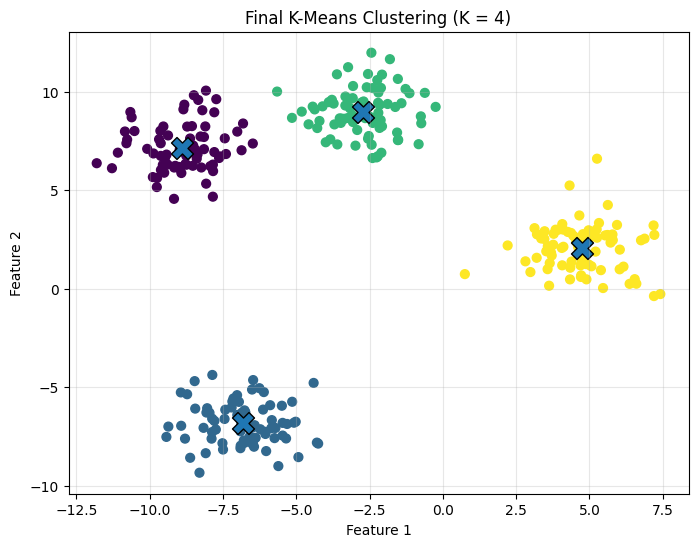

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# -----------------------------------
# Settings
# -----------------------------------
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

N_SAMPLES = 300
TRUE_CENTERS = 4      # REQUIRED: 4 distinct clusters
CLUSTER_STD = 1.2

# -----------------------------------
# 1) Generate synthetic dataset
# -----------------------------------
X, y_true = make_blobs(
    n_samples=N_SAMPLES,
    centers=TRUE_CENTERS,
    cluster_std=CLUSTER_STD,
    random_state=RANDOM_STATE
)

# -----------------------------------
# 2) K-Means from scratch (NumPy only)
# -----------------------------------
def kmeans(X, k, max_iters=300, tol=1e-4):
    centroids = X[np.random.choice(len(X), k, replace=False)].astype(float)

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                new_centroids.append(X[np.random.randint(0, len(X))])
            else:
                new_centroids.append(cluster_points.mean(axis=0))

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids, atol=tol):
            break

        centroids = new_centroids

    wcss = np.sum((X - centroids[labels]) ** 2)
    return centroids, labels, wcss

# -----------------------------------
# 3) Elbow & Silhouette Analysis (K=2 to 7)
# -----------------------------------
K_range = range(2, 8)

wcss_list = []
silhouette_list = []

print("\nSilhouette Scores (K = 2 to 7):")
for k in K_range:
    centroids, labels, wcss = kmeans(X, k)
    wcss_list.append(wcss)

    score = silhouette_score(X, labels)
    silhouette_list.append(score)

    print(f"K = {k} → Silhouette Score = {score:.4f}")

# -----------------------------------
# 4) Plot Elbow & Silhouette
# -----------------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(K_range, wcss_list, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_list, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.tight_layout()
plt.show()

# -----------------------------------
# 5) Final Model using best K
# -----------------------------------
best_k = K_range[np.argmax(silhouette_list)]
print(f"\nBest K selected using Silhouette Score: K = {best_k}")

centroids, labels, final_wcss = kmeans(X, best_k)

# -----------------------------------
# 6) Cluster Interpretation
# -----------------------------------
print("\nCluster Interpretation:")
for i in range(best_k):
    cluster_points = X[labels == i]
    print(
        f"Cluster {i}: "
        f"Size = {len(cluster_points)}, "
        f"Mean Feature-1 = {cluster_points[:,0].mean():.2f}, "
        f"Mean Feature-2 = {cluster_points[:,1].mean():.2f}"
    )

# -----------------------------------
# 7) Final Visualization
# -----------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, s=40)
plt.scatter(
    centroids[:,0], centroids[:,1],
    s=250, marker='X', edgecolor='black'
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Final K-Means Clustering (K = {best_k})")
plt.grid(alpha=0.3)
plt.show()